In [7]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [5]:
# Ne fait rien car TensorFlow ne voit pas de GPU (support natif sur Windows arrêté depuis TensorFlow 2.10).
tf.config.set_visible_devices([], 'GPU')


In [26]:
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

In [10]:
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

In [32]:
X = np.array(observations_entrainement.iloc[:, 1:])


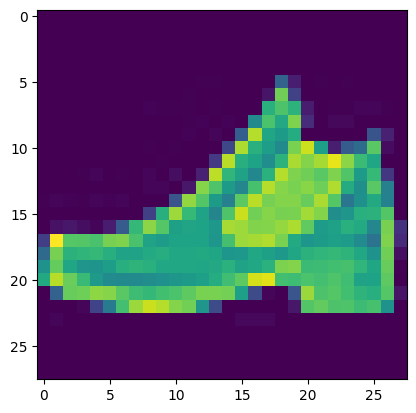

In [34]:

premiereImage = X[1]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [ ]:
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))

In [36]:
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255


In [38]:
X_validation = X_validation.reshape(X_validation.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [39]:
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée (28x28 pixels avec 1 canal de couleur)
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche (Une modele qui limite le courant des données de un input à un output)
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée (Définit que les images d'entrée auront des dimensions de 28 x 28 pixels avec 1 canal de couleur.)
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance (Éviter le sur-apprentissage)
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [41]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [42]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8044 - loss: 0.5603 - val_accuracy: 0.1007 - val_loss: 4.0714
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8717 - loss: 0.3623 - val_accuracy: 0.1007 - val_loss: 5.6030
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8876 - loss: 0.3157 - val_accuracy: 0.1007 - val_loss: 6.7602
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8959 - loss: 0.2878 - val_accuracy: 0.1007 - val_loss: 7.2837
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9046 - loss: 0.2666 - val_accuracy: 0.1007 - val_loss: 7.5107
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9080 - loss: 0.2540 - val_accuracy: 0.1007 - val_loss: 7.7903
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9148 - loss: 0.2363 - val_accuracy: 0.1007 - val_loss: 7.5952
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9186 - loss: 0.2235 - val_accu

In [43]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.23625397682189941
Précision: 0.9154999852180481


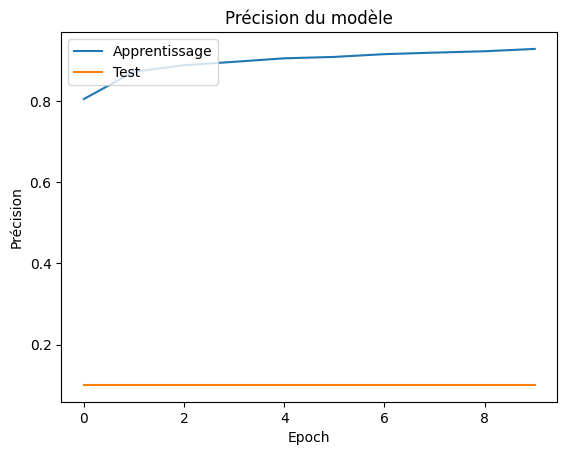

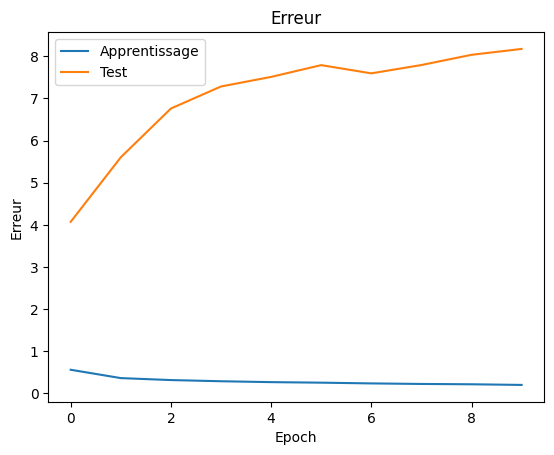

In [44]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()